In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [66]:
df = pd.read_csv('kc_house_data.csv')
df2 = pd.read_excel('king-county-wa-neighborhoods-Report.xls')


In [ ]:
df2.drop(columns= ['id', 'bedrooms', 'bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace=True)

In [50]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [51]:
df.shape


(21597, 21)

In [52]:
df.dropna(how = 'any', axis = 0, subset = ['view'], inplace=True)

In [53]:
#df.drop(columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
      # 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
      # 'sqft_above', 'sqft_basement', 'zipcode',
      # 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace = True, axis = 1)


In [54]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

df.date.dtype

dtype('<M8[ns]')

In [55]:
df["month"] = df.date.dt.month
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,19164.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,17704.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,4.582351e+09,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.007566,0.233863,3.409724,7.657425,1788.557537,1971.002275,83.765025,98077.939352,47.560180,-122.213948,1986.299944,12751.079502,6.575555
std,2.876779e+09,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.086657,0.765686,0.650654,1.172643,827.745641,29.376044,400.239690,53.506639,0.138528,0.140735,685.121001,27255.483308,3.113740
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,2.123212e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,4.000000
50%,3.904945e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000,6.000000
75%,7.312175e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


In [56]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]


In [57]:
month_map = dict(zip(range(1, 13), months))


In [58]:
df["month_name"] = df["month"].map(month_map)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,month_name
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,Oct
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,Dec
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2,Feb
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,Dec
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,Feb


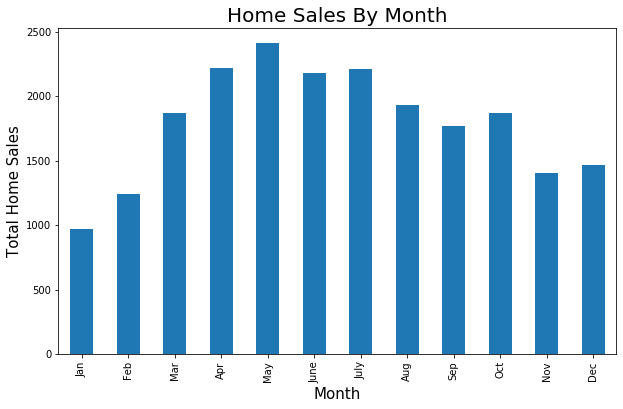

In [62]:
plt.figure(figsize = (10,6))
ax = df["month"].value_counts().sort_index().plot(kind='bar')

plt.title("Home Sales By Month", fontsize = 20)
plt.ylabel('Total Home Sales', fontsize = 15)
plt.xlabel('Month', fontsize = 15)
plt.xticks(ticks=range(12), labels=months)

plt.show()